In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [135]:
#Q1
##section 1
df =  pd.read_csv(r'.\heart_diagnose.csv')
df

#G:\coulege\term 8\data mining\tamrin 4\solutions\heart_diagnose.csv

,age,sex,pain type,resting blood pressure,cholestoral,fasting blood sugar,resting electrocardiographic results,maximum heart rate,exercise induced angina,oldpeak,slope of peak,num of major vessels,thal,heart disease
0,70,1.0,four,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,normal,1
1,67,0.0,three,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,reversable defect,0
2,57,1.0,two,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,reversable defect,1
3,64,1.0,four,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,reversable defect,0
4,74,0.0,two,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1.0,three,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,reversable defect,0
266,44,1.0,two,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,reversable defect,0
267,56,0.0,two,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,normal,0
268,57,1.0,four,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,fixed defect,0


In [136]:
df["thal"].unique()

array(['normal', 'reversable defect', 'fixed defect'], dtype=object)

In [137]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    int64  
 1   sex                                   270 non-null    float64
 2   pain type                             270 non-null    object 
 3   resting blood pressure                270 non-null    float64
 4   cholestoral                           270 non-null    float64
 5   fasting blood sugar                   270 non-null    float64
 6   resting electrocardiographic results  270 non-null    float64
 7   maximum heart rate                    270 non-null    float64
 8   exercise induced angina               270 non-null    float64
 9   oldpeak                               270 non-null    float64
 10  slope of peak                         270 non-null    float64
 11  num of major vessel

In [138]:
df.isnull().sum()

age                                     0
sex                                     0
pain type                               0
resting blood pressure                  0
cholestoral                             0
fasting blood sugar                     0
resting electrocardiographic results    0
maximum heart rate                      0
exercise induced angina                 0
oldpeak                                 0
slope of peak                           0
num of major vessels                    0
thal                                    0
heart disease                           0
dtype: int64

In [139]:
cols=["age","resting blood pressure","cholestoral","fasting blood sugar","resting electrocardiographic results","maximum heart rate",
     "exercise induced angina","oldpeak","slope of peak","num of major vessels","heart disease"]
df1=df[cols]
df1

,age,resting blood pressure,cholestoral,fasting blood sugar,resting electrocardiographic results,maximum heart rate,exercise induced angina,oldpeak,slope of peak,num of major vessels,heart disease
0,70,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,1
1,67,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,0
2,57,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,1
3,64,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,0
4,74,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
265,52,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,0
266,44,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,0
267,56,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,0
268,57,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,0


In [140]:
#Q1-b

from scipy import stats
z = np.abs(stats.zscore(df1))
#threshold = 3
# print(np.where(z > 3))
cdf1 =  df1[(z < 3).all(axis=1)]
print('shape of original df is: ',df1.shape)
print('shape of df after removing outliers using zscore is: ',cdf1.shape)

shape of original df is:  (270, 11)
shape of df after removing outliers using zscore is:  (261, 11)


In [141]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
dfs = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
dfs


,age,resting blood pressure,cholestoral,fasting blood sugar,resting electrocardiographic results,maximum heart rate,exercise induced angina,oldpeak,slope of peak,num of major vessels,heart disease
2,57,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,1
3,64,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,0
4,74,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,0
5,65,120.0,177.0,0.0,0.0,140.0,0.0,0.4,1.0,0.0,0
7,59,110.0,239.0,0.0,2.0,142.0,1.0,1.2,2.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
263,49,130.0,266.0,0.0,0.0,171.0,0.0,0.6,1.0,0.0,0
264,48,110.0,229.0,0.0,0.0,168.0,0.0,1.0,3.0,0.0,1
266,44,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,0
267,56,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,0


In [142]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cdf1)
X_normalized = normalize(X_scaled)
X = pd.DataFrame(X_normalized)

In [143]:
pca = PCA(n_components = 2)
X = pd.DataFrame(pca.fit_transform(X),columns=['Feature 1', 'Feature 2'])
X.head()

,Feature 1,Feature 2
0,0.796885,0.291914
1,-0.170185,0.003437
2,0.380589,-0.128622
3,0.301144,0.324112
4,-0.402981,-0.225439


In [144]:
from sklearn.cluster import KMeans

SSE = []
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)

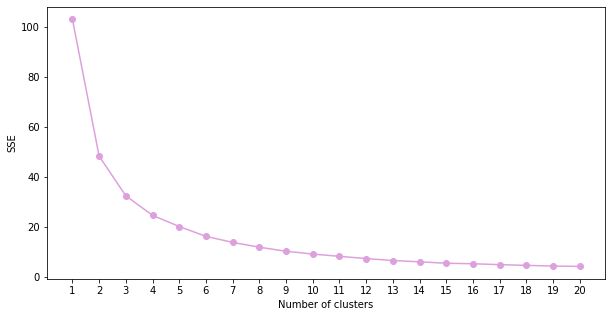

In [145]:
plt.rcParams['figure.figsize']=(10,5)
plt.xticks(range(1, 21))
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.plot(range(1,21),SSE,c='plum',marker = 'o')
plt.show()

In [146]:
from kneed import KneeLocator
kLocater = KneeLocator( range(1, 21), SSE, curve='convex', direction='decreasing')
print('Approprate number of clusters is: ',kLocater.elbow)

Approprate number of clusters is:  4


In [147]:
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df1)
    Sum_of_squared_distances.append(km.inertia_)

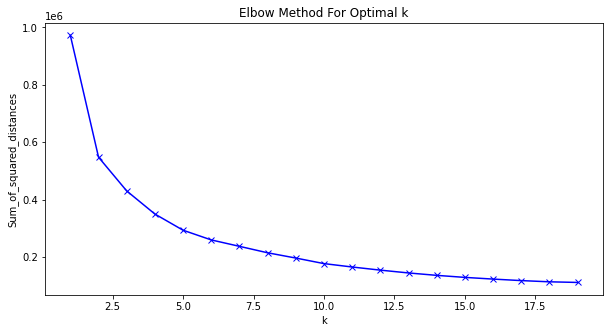

In [148]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [149]:
silhouette_scores = []
for k in range(2,20):
    silhouette_scores.append(
        silhouette_score(X,KMeans(n_clusters = k).fit_predict(X)))

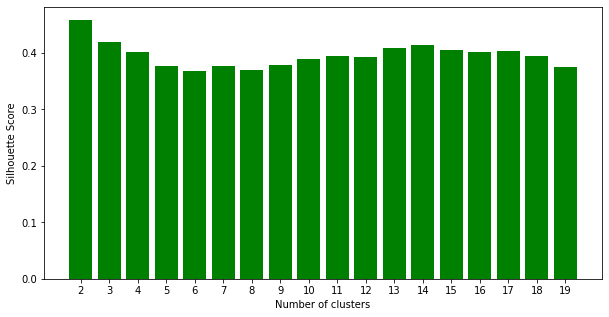

In [150]:
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 20))
plt.bar(range(2,20), silhouette_scores,color='green')
plt.show()

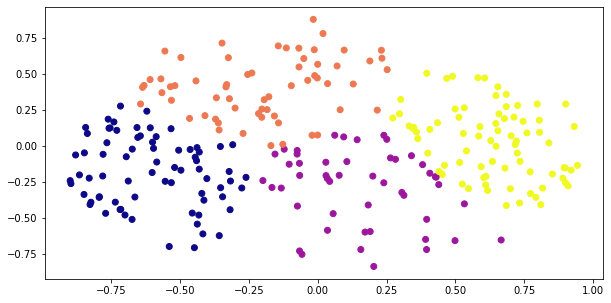

In [152]:
kmeans = KMeans(n_clusters=4,init='k-means++')
plt.scatter(X['Feature 1'], X['Feature 2'], 
           c = kmeans.fit_predict(X), cmap ='plasma')

plt.show()

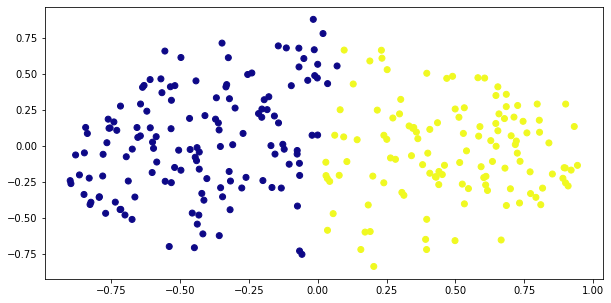

In [153]:
kmeans = KMeans(n_clusters=2,init='k-means++')
plt.scatter(X['Feature 1'], X['Feature 2'], 
           c = kmeans.fit_predict(X), cmap ='plasma')

plt.show()

In [159]:
kmeans = KMeans(n_clusters=4,init='k-means++').fit(X)


clusters  =kmeans.labels_
cluster1 = X.loc[clusters==0]
cluster2 = X.loc[clusters==1]
cluster3 = X.loc[clusters==2]
cluster4 = X.loc[clusters==3]

kmeans.cluster_centers_

array([[-0.20428963,  0.40986041],
       [-0.60194623, -0.17913463],
       [ 0.6358243 ,  0.02518097],
       [ 0.15611348, -0.29129494]])

In [160]:

cluster1.describe()

,Feature 1,Feature 2
count,62.000000,62.000000
mean,-0.204290,0.409860
std,0.245068,0.203955
min,-0.643812,0.003437
25%,-0.366630,0.252354
50%,-0.189374,0.420236
75%,-0.013824,0.564654
max,0.251903,0.879276


In [156]:
cluster2.describe()

,Feature 1,Feature 2
count,57.000000,57.000000
mean,-0.220407,0.438485
std,0.246035,0.185123
min,-0.643812,0.087909
25%,-0.371485,0.292065
50%,-0.203559,0.430874
75%,-0.016438,0.590582
max,0.251903,0.879276


In [157]:
cluster3.describe()

,Feature 1,Feature 2
count,69.000000,69.000000
mean,-0.619256,-0.166768
std,0.170246,0.234418
min,-0.899337,-0.704744
25%,-0.761344,-0.351679
50%,-0.644463,-0.167212
75%,-0.448263,0.009696
max,-0.309042,0.277641


In [158]:
cluster4.describe()

,Feature 1,Feature 2
count,47.000000,47.000000
mean,0.042664,-0.290779
std,0.202054,0.262036
min,-0.357924,-0.834857
25%,-0.089516,-0.488192
50%,0.034739,-0.239049
75%,0.186660,-0.086817
max,0.498335,0.076839


In [102]:
onehot = pd.get_dummies(df, columns=['thal','pain type'])
onehot

,age,sex,resting blood pressure,cholestoral,fasting blood sugar,resting electrocardiographic results,maximum heart rate,exercise induced angina,oldpeak,slope of peak,num of major vessels,heart disease,thal_fixed defect,thal_normal,thal_reversable defect,pain type_four,pain type_one,pain type_three,pain type_two
0,70,1.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,1,0,1,0,1,0,0,0
1,67,0.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,0,0,0,1,0,0,1,0
2,57,1.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,1,0,0,1,0,0,0,1
3,64,1.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,0,0,0,1,1,0,0,0
4,74,0.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,0,0,0,1,0,0,1,0
266,44,1.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,0,0,0,1,0,0,0,1
267,56,0.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,0,0,1,0,0,0,0,1
268,57,1.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,0,1,0,0,1,0,0,0


In [106]:
from sklearn.cluster import KMeans
pca = PCA(n_components = 2)
X = pd.DataFrame(pca.fit_transform(onehot),columns=['Feature 1', 'Feature 2'])
X.head()

SSE = []
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)

from kneed import KneeLocator
kLocater = KneeLocator( range(1, 21), SSE, curve='convex', direction='decreasing')
print('Approprate number of clusters is: ',kLocater.elbow)

Approprate number of clusters is:  5


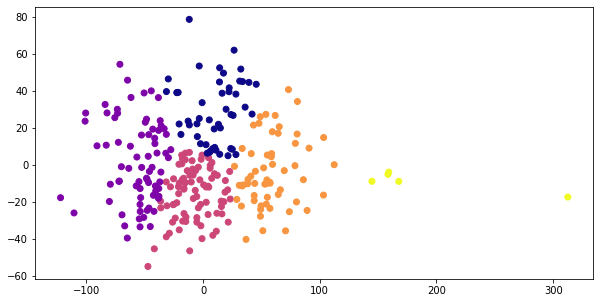

In [107]:
kmeans = KMeans(n_clusters=5,init='k-means++')
plt.scatter(X['Feature 1'], X['Feature 2'], 
           c = kmeans.fit_predict(X), cmap ='plasma')

plt.show()

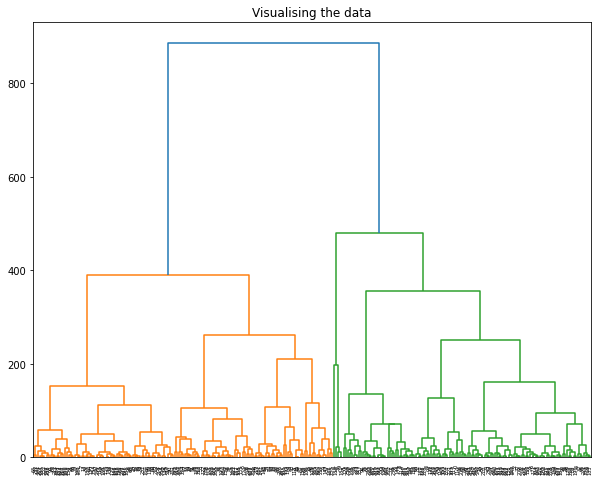

In [108]:

plt.rcParams['figure.figsize']=(10,8)
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X, method ='ward')))

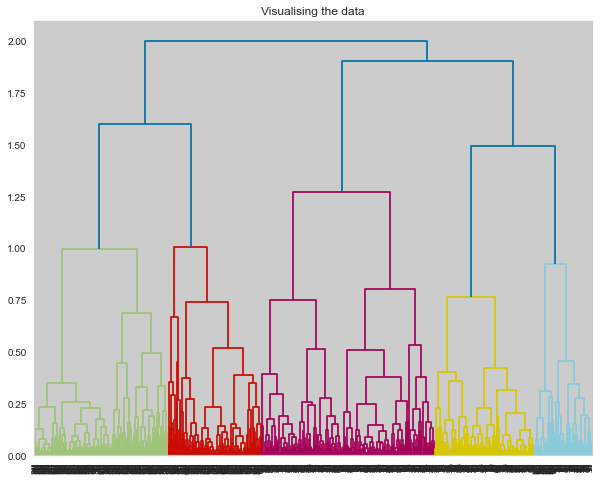

In [29]:

plt.rcParams['figure.figsize']=(10,8)
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X, method ='complete')))


# Q2

In [3]:
dfbank =  pd.read_csv(r'.\BankNote.csv')
dfbank

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dfbank)
X_normalized = normalize(X_scaled)
X = pd.DataFrame(X_normalized)

In [5]:
pca = PCA(n_components = 2)
X = pd.DataFrame(pca.fit_transform(X),columns=['Feature 1', 'Feature 2'])
X.head()

,Feature 1,Feature 2
0,-0.829851,-0.229293
1,-0.859731,-0.277045
2,-0.496482,0.708426
3,-0.719628,-0.629937
4,-0.008644,0.747272


In [6]:



silhouette_scores = []
for k in range(2,21):
    silhouette_scores.append(
        silhouette_score(X,AgglomerativeClustering(n_clusters = k).fit_predict(X)))

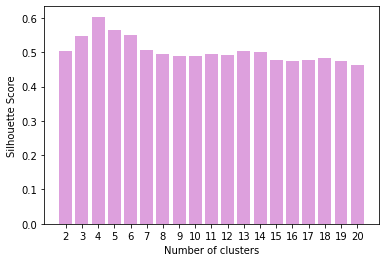

In [7]:
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 21))
plt.bar(range(2,21), silhouette_scores,color='plum')
plt.show()

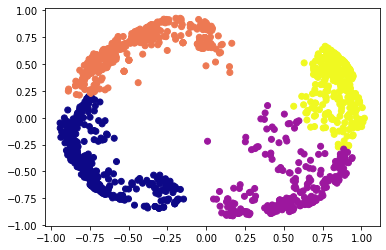

In [8]:
agg = AgglomerativeClustering(n_clusters = 4)
plt.scatter(X['Feature 1'], X['Feature 2'], 
           c = agg.fit_predict(X), cmap ='plasma')

plt.show()

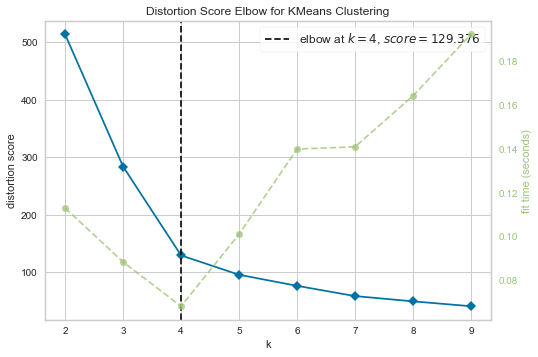

In [9]:
from sklearn.cluster import KMeans 
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(X)
visualizer.show()
plt.show()

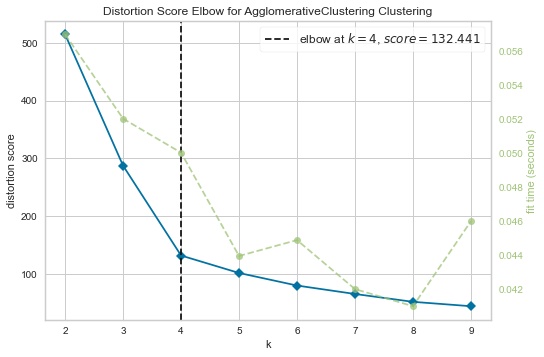

In [10]:
from sklearn.cluster import KMeans 
from yellowbrick.cluster import KElbowVisualizer
agg = AgglomerativeClustering()

visualizer = KElbowVisualizer(agg, k=(2,10))

visualizer.fit(X)
visualizer.show()
plt.show()

Text(0.5, 1.0, 'Different Inertia Values for Different Number of Clusters')

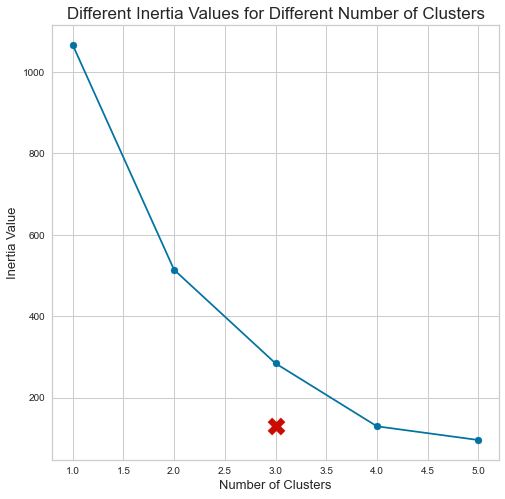

In [11]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

inertia_list = []
for num_clusters in range(1, 6):
    kmeans_model = KMeans(n_clusters=num_clusters, init="k-means++")
    kmeans_model.fit(X)
    inertia_list.append(kmeans_model.inertia_)
    
# plot the inertia curve
plt.plot(range(1,6),inertia_list)
plt.scatter(range(1,6),inertia_list)
plt.scatter(3, inertia_list[3], marker="X", s=300, c="r")
plt.xlabel("Number of Clusters", size=13)
plt.ylabel("Inertia Value", size=13)
plt.title("Different Inertia Values for Different Number of Clusters", size=17)

C:\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


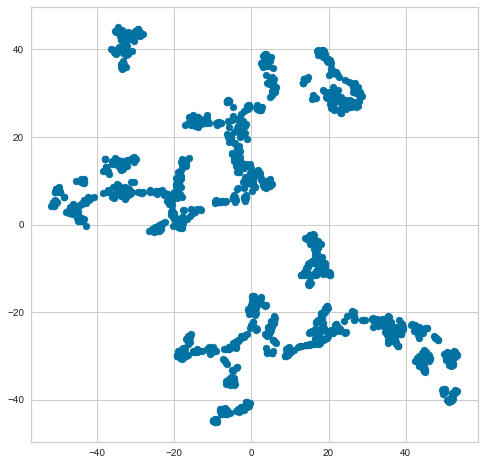

In [15]:

df2=dfbank
from sklearn.manifold import TSNE
scaled_data = StandardScaler().fit_transform(df2)
tSNE = TSNE(n_components=2)
result = tSNE.fit_transform(scaled_data)
plt.scatter(result[:,0],result[:,1])

In [197]:
from sklearn.cluster import DBSCAN

db=DBSCAN(eps=1.3,min_samples=4)
model=db.fit(df2)

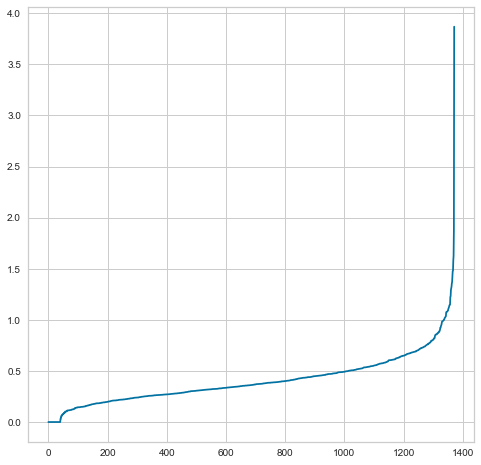

In [198]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbors.fit(df2)
distances, indices = neighbors_fit.kneighbors(df2)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

<AxesSubplot:>

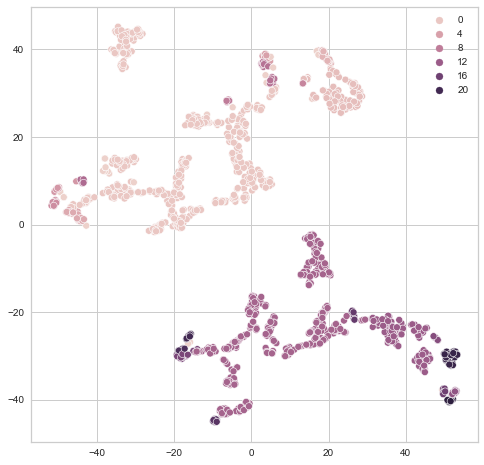

In [199]:
sns.scatterplot(x=result[:,0],y=result[:,1],hue=model.labels_)

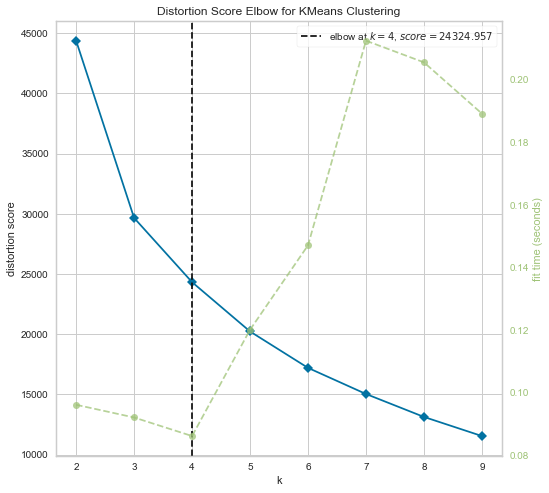

In [200]:
from sklearn.cluster import KMeans 
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(df2)
visualizer.show()
plt.show()

# Q3


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.decomposition import PCA


from sklearn.cluster import AgglomerativeClustering

from sklearn.preprocessing import StandardScaler, normalize

from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

import seaborn as sns
%matplotlib inline
pd.options.display.max_columns=20




In [2]:
ls

 Volume in drive G has no label.
 Volume Serial Number is F5B9-1350

 Directory of G:\coulege\term 8\data mining\tamrin 4\tamrin ezafe

04/19/2023  05:17 PM    <DIR>          .
04/19/2023  05:17 PM    <DIR>          ..
04/19/2023  05:17 PM    <DIR>          .ipynb_checkpoints
10/13/2019  08:14 PM            46,442 BankNote.csv
05/15/2021  08:59 AM            16,483 credits.csv
03/09/2022  01:36 AM            18,732 heart_diagnose.csv
04/18/2023  10:28 AM         1,147,064 Untitled.ipynb
               4 File(s)      1,228,721 bytes
               3 Dir(s)   7,924,531,200 bytes free


In [3]:
df2=pd.read_csv(".\Mall_Customers.csv")
df2

FileNotFoundError: [Errno 2] No such file or directory: '.\\Mall_Customers.csv'

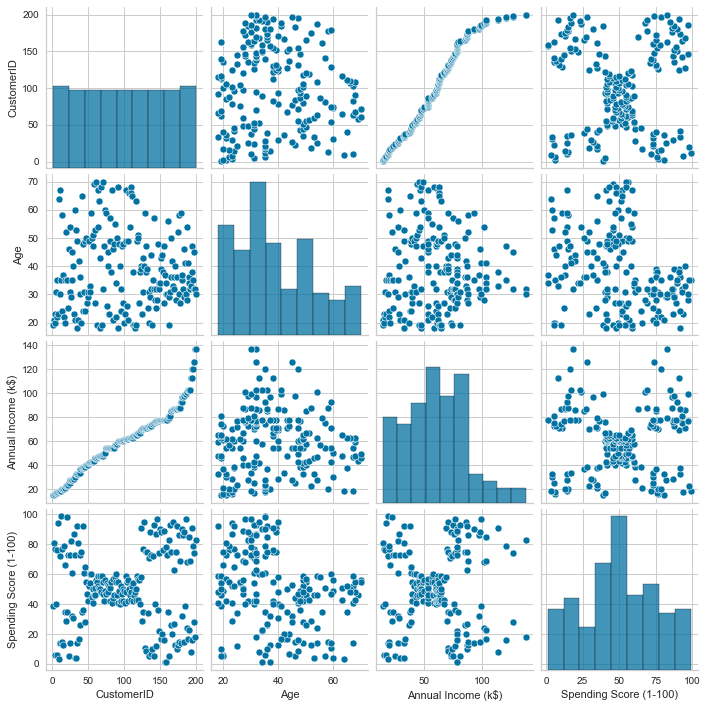

In [189]:
sns.pairplot(df2)

<AxesSubplot:>

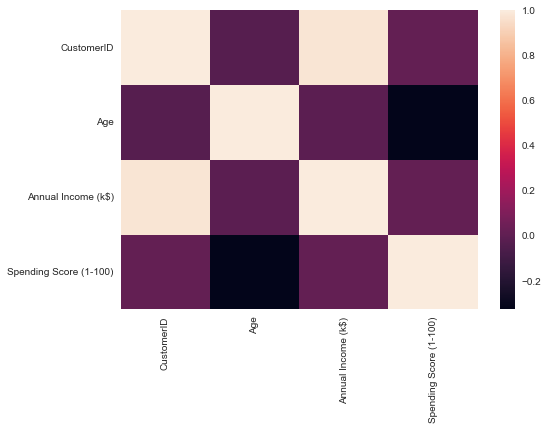

In [190]:
sns.heatmap(df2.corr())

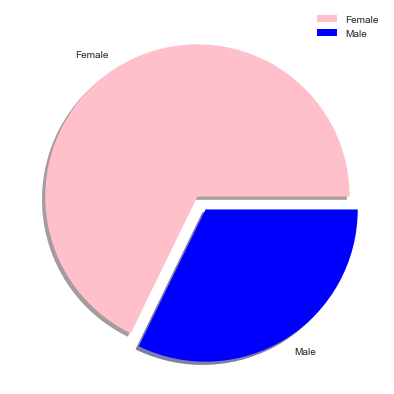

In [207]:
plt.figure(figsize=(7,7))
size=df2['sex'].value_counts()
label=['Female','Male']
color=['Pink','Blue']
explode=[0,0.1]
plt.pie(size,explode=explode,labels=label,colors=color,shadow=True)
plt.legend()
plt.show()

C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 [Text(0, 0, '18'),
  Text(1, 0, '19'),
  Text(2, 0, '20'),
  Text(3, 0, '21'),
  Text(4, 0, '22'),
  Text(5, 0, '23'),
  Text(6, 0, '24'),
  Text(7, 0, '25'),
  Text(8, 0, '26'),
  Text(9, 0, '27'),
  Text(10, 0, '28'),
  Text(11, 0, '29'),
  Text(12, 0, '30'),
  Text(13, 0, '31'),
  Text(14, 0, '32'),
  Text(15, 0, '33'),
  Text(16, 0, '34'),
  Text(17, 0, '35'),
  Text(18, 0, '36'),
  Text(19, 0, '37'),
  Text(20, 0, '38'),
  Text(21, 0, '39'),
  Text(22, 0, '40'),
  Text(23, 0, '41'),
  Text(24, 0, '42'),
  Text(25, 0, '43'),
  Text(26, 0, '44'),
  Text(27, 0, '45'),
  Text(28, 0, '46'),
  Text(29, 0, '47'),
  Text(30, 0, '48'),
  Text(31, 0, '49'),
  Text(32, 0, '50'),
  Text(33, 0, '51'),
  Text(34, 0, '52'),
  Text(35, 0, '53'),
  Text(36, 0, '54'),
  T

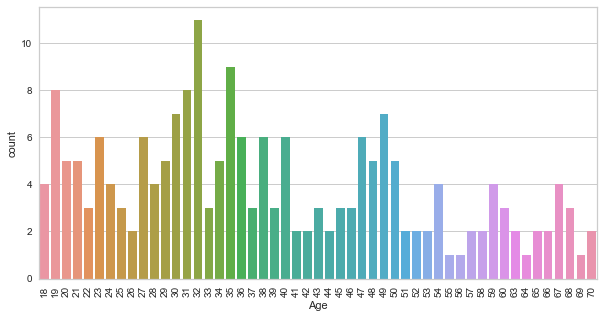

In [212]:
plt.figure(figsize=(10,5))
sns.countplot(df2["Age"])
plt.xticks(rotation=90)

C:\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


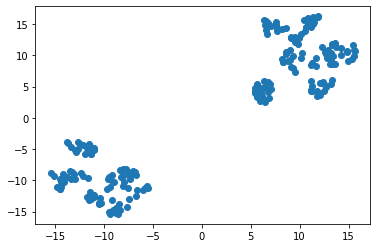

In [10]:
df2= pd.get_dummies(df2, columns=["Gender"])
df2
from sklearn.manifold import TSNE
scaled_data = StandardScaler().fit_transform(df2)
tSNE = TSNE(n_components=2)
result = tSNE.fit_transform(scaled_data)
plt.scatter(result[:,0],result[:,1])

In [19]:
df2

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0
...,...,...,...,...,...,...
195,196,35,120,79,1,0
196,197,45,126,28,1,0
197,198,32,126,74,0,1
198,199,32,137,18,0,1


In [155]:
from sklearn.cluster import DBSCAN

db=DBSCAN(eps=18,min_samples=4)
model=db.fit(df2)


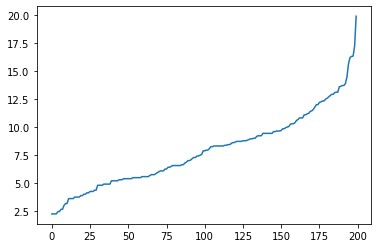

In [158]:
from sklearn.neighbors import NearestNeighbors
neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbors.fit(df2)
distances, indices = neighbors_fit.kneighbors(df2)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

<AxesSubplot:>

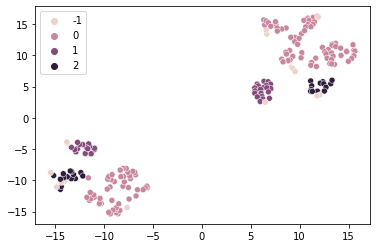

In [157]:

sns.scatterplot(x=result[:,0],y=result[:,1],hue=model.labels_)

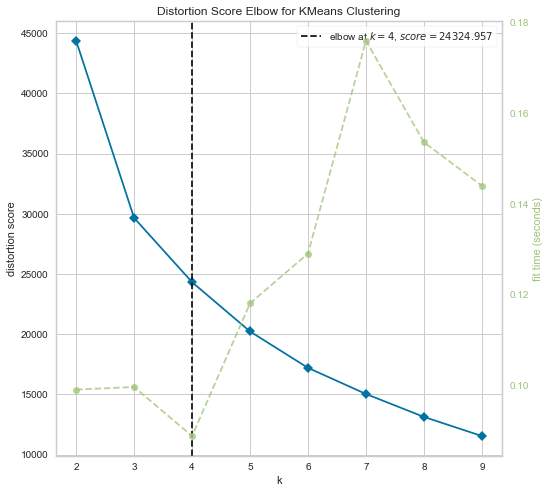

In [69]:

from sklearn.cluster import KMeans 
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(df2)
visualizer.show()
plt.show()

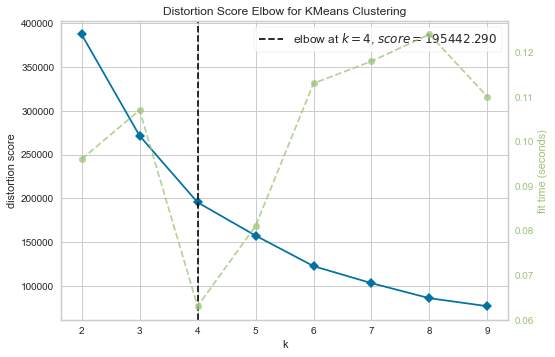